In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
import altair as alt
import libpysal as lp
import mapclassify as mc
import pysal as ps
from legendgram import legendgram
import palettable.matplotlib as mplpal
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [14]:
a = '/Users/confade/Documents/covid-bo/gpkg-bo/cap_muni.gpkg'
b = '/Users/confade/Documents/covid-bo/gpkg-bo/dptos_bol.gpkg'
c = '/Users/confade/Documents/covid-bo/gpkg-bo/muni_bol.gpkg'
d = '/Users/confade/Documents/analyse_covid-bo/donnees/covid-muni.csv'
e = '/Users/confade/Documents/analyse_covid-bo/donnees/pob-bo_2020.csv'
dfa = gpd.read_file(a)
dfb = gpd.read_file(b)
dfc = gpd.read_file(c)
dfd = pd.read_csv(d)
dfe = pd.read_csv(e)

In [4]:
dta_2 = dfd[['Dpto', 'Municipio', '_030620']]
dta = dfd[['id_municip', 'Municipio', '_060420', '_190420', '_030520', '_170520', '_240520', '_030620']]
cmun = dfa[['id_municip', 'geometry']]
pob20 = dfe[['id_municip', '_2020']]
#mun_i = dfc[['id_municip', 'geometry']]
mun_i = dfc[['dptos', 'id_municip', 'geometry']]
cvd = cmun.merge(dta, on='id_municip')
pobcvd = dta.merge(pob20, on='id_municip')

## Propagación de contagios por COVID-19 (SARS-CoV-2)

Adhemar Conde (adhemarfabio@gmail.com)

Hasta el día 03-06-2020 en Bolivia se registra un total de 11638 casos positivos de COVID-19 (SARS-CoV-2). El mayor numero de casos se concentra en el departamento de Santa Cruz de la Sierra, seguido de Beni, Cochabamba, La Paz, Oruro, Potosi, Tarija y finalmente Pando.


In [5]:
dpts = alt.Chart(dfd).mark_bar().encode(
    x = alt.X('sum(_030620):Q', axis=alt.Axis(title='Casos positivos hasta el 03-06-2020')),
    y = alt.Y('Dpto:N', axis=alt.Axis(title='Departamentos'))
).properties(
    title='COVID-19'
)

text = dpts.mark_text(
    align = 'left',
    baseline ='middle',
    dx = 3
).encode(
    text = 'sum(_030620):Q'
)
(dpts + text).properties(height=200)

alt.LayerChart(...)

(-70.25478666116759,
 -56.844892902307244,
 -23.56841514759971,
 -9.007786233347966)

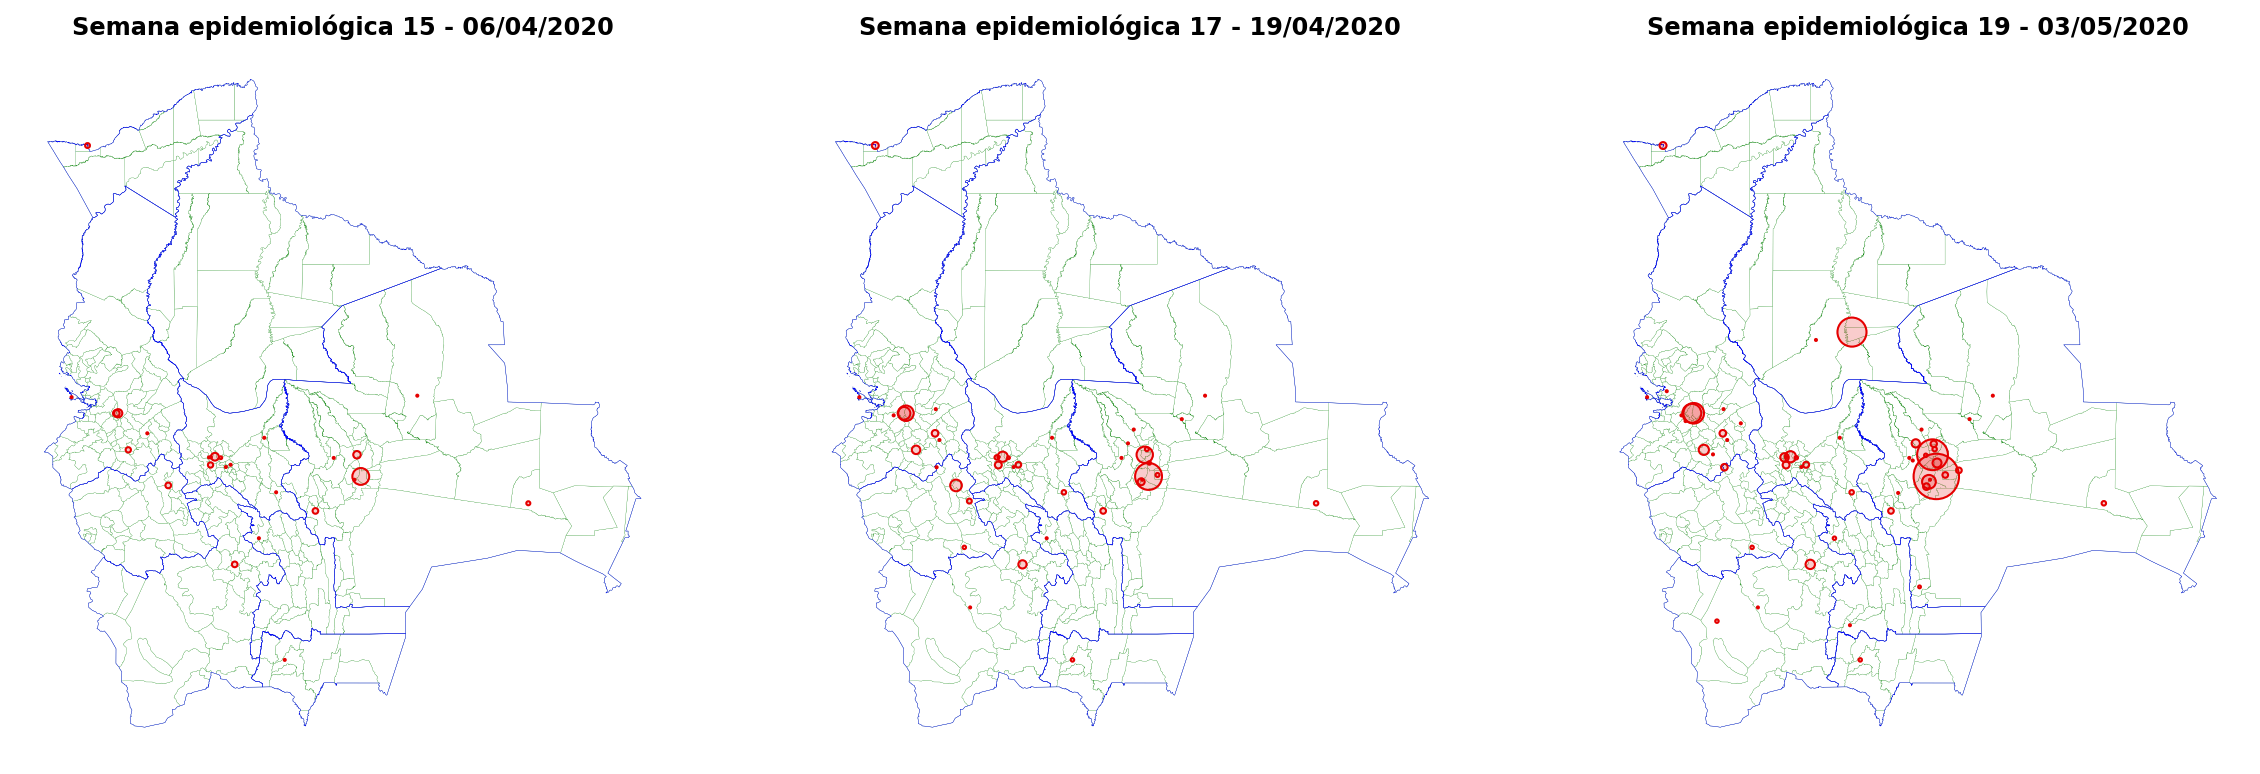

In [11]:
fig, ax = plt.subplots(1,3, figsize = (20,20))
dfc.plot(ax=ax[0], edgecolor = 'g', linewidth = 0.1, facecolor = 'w')
dfb.plot(ax=ax[0], edgecolor = 'b', linewidth = 0.2, facecolor = 'none')
ax[0].set_title('Semana epidemiológica 15 - 06/04/2020', fontweight="bold")
cvd.plot(ax=ax[0], markersize = '_060420', color = '#e50000', alpha = .2)
cvd.plot(ax=ax[0], edgecolor = '#e50000', facecolor = 'none', markersize = '_060420')
dfc.plot(ax=ax[1], edgecolor = 'g', linewidth = 0.1, facecolor = 'w')
dfb.plot(ax=ax[1], edgecolor = 'b', linewidth = 0.2, facecolor = 'none')
ax[1].set_title('Semana epidemiológica 17 - 19/04/2020', fontweight="bold")
cvd.plot(ax=ax[1], markersize = '_190420', color = '#e50000', alpha = .2)
cvd.plot(ax=ax[1], edgecolor = '#e50000', facecolor = 'none', markersize = '_190420')
dfc.plot(ax=ax[2], edgecolor = 'g', linewidth = 0.1, facecolor = 'w')
dfb.plot(ax=ax[2], edgecolor = 'b', linewidth = 0.2, facecolor = 'none')
ax[2].set_title('Semana epidemiológica 19 - 03/05/2020', fontweight="bold")
cvd.plot(ax=ax[2], markersize = '_030520', color = '#e50000', alpha = .2)
cvd.plot(ax=ax[2], edgecolor = '#e50000', facecolor = 'none', markersize = '_030520')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (20,20))
dfc.plot(ax=ax[0], edgecolor = 'g', linewidth = 0.1, facecolor = 'w')
dfb.plot(ax=ax[0], edgecolor = 'b', linewidth = 0.2, facecolor = 'none')
ax[0].set_title('Semana epidemiológica 21 - 17/05/2020', fontweight="bold")
cvd.plot(ax=ax[0], markersize = '_170520', color = '#e50000', alpha = .2)
cvd.plot(ax=ax[0], edgecolor = '#e50000', facecolor = 'none', markersize = '_170520')
dfc.plot(ax=ax[1], edgecolor = 'g', linewidth = 0.1, facecolor = 'w')
dfb.plot(ax=ax[1], edgecolor = 'b', linewidth = 0.2, facecolor = 'none')
ax[1].set_title('Semana epidemiológica 22 - 24/05/2020', fontweight="bold")
cvd.plot(ax=ax[1], markersize = '_240520', color = '#e50000', alpha = .2)
cvd.plot(ax=ax[1], edgecolor = '#e50000', facecolor = 'none', markersize = '_240520')
dfc.plot(ax=ax[2], edgecolor = 'g', linewidth = 0.1, facecolor = 'w')
dfb.plot(ax=ax[2], edgecolor = 'b', linewidth = 0.2, facecolor = 'none')
ax[2].set_title('Semana epidemiológica 23 - 03/06/2020', fontweight="bold")
cvd.plot(ax=ax[2], markersize = '_030620', color = '#e50000', alpha = .2)
cvd.plot(ax=ax[2], edgecolor = '#e50000', facecolor = 'none', markersize = '_030620')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

- Los municipios que concentran los valores más altos de casos positivos de COVID-19 son:

In [ ]:
sort_2 = dta_2.sort_values('_030620', ascending=False)
sort_2.head(15)

## Tasa de incidencia

El 11 de marzo en Boliva se confirman los dos primero casos positivos de COVID-19. Hasta el día 3/06/2020 llevamos 86 días de pandemia. Es sobre esta base de tiempo que se calcula la 'Tasa de incidencia' a la escala de los municipios por cada 100 mil habitantes.

In [ ]:
pobcvd['ix100k'] = pobcvd['_030620'] / pobcvd['_2020']*100000
inci = mun_i.merge(pobcvd, on='id_municip')

In [ ]:
hist = seaborn.distplot(pobcvd['ix100k']);

In [ ]:
y=pobcvd['ix100k']
fj6=mc.FisherJenks(y, k=6)
bins = mc.FisherJenks(inci['ix100k'].values, k=6).bins

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw = {'aspect' : 'equal'})
dfc.plot(ax=ax, edgecolor = 'grey', linewidth = 0.1, facecolor = 'w')
inci.plot(column='ix100k', scheme='FisherJenks', k=6, cmap = 'viridis_r',
             legend = True, ax=ax, edgecolor = 'w', linewidth = 0.2)
ax.set_axis_off()
dfb.plot(ax=ax, edgecolor = 'b', linewidth = 0.3, facecolor = 'none')
legendgram(fig, ax, inci['ix100k'], bins, pal=mplpal.Viridis_6_r,
          legend_size=(0.25, 0.1875),
          loc='lower right',
          clip=(0, 1500))
ax.set_title('03/04/2020 - Tasa de incidencia por 100 mil habitantes', fontweight="bold")
#plt.annotate()
plt.show()

In [ ]:
fj6

 - Los municipios con las más altas tasas de incidencia son:

In [ ]:
inci_s = inci[['dptos', 'Municipio', 'ix100k']]
sort = inci_s.sort_values('ix100k', ascending=False)
sort.head(15)

### Sobre los datos

Los datos de casos positivos COVID-19, son obtenidos a partir de la información que brindan diariamente los nueve SEDES Departamentales, los Gobiernos Autónomos Departamentales y periodicos de circulación nacional, en particular: El Potosí, Opinión, Los Tiempos, Correos del Sur.

Los datos de población para el año 2020 correponden a "Proyecciones de población" elaborado por el [INE](https://www.ine.gob.bo/index.php/censos-y-proyecciones-de-poblacion-sociales/).


Las fuentes cartografias son obtenidas de la [IDE-EPB](https://geo.gob.bo/portal/#map) (Infraestructura de Datos Espaciales del Estado Plurinacional de Bolivia)
- Limítes departamentales de Boliva
- Limítes municipales de Bolivia
- Capitales municipales de Boliva

©AdhemarConde, 2020

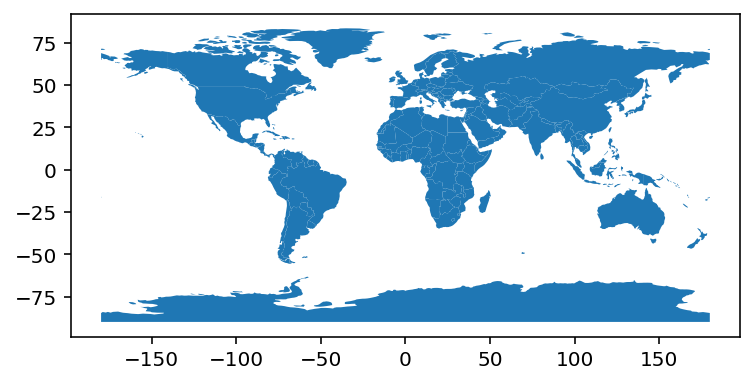

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

In [18]:
import matplotlib.pyplot as plt
plt.savefig('world.svg', dpi = 300)

<Figure size 432x288 with 0 Axes>